# IT Academy - Data Science with Python
## Sprint 6: Sampling Methods
### [Github Sampling Methods](https://github.com/jesussantana/Sampling)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Sampling.svg)](https://wakatime.com/badge/github/jesussantana/Sampling)

### Exercise 1:  

  - Grab a sports-themed dataset you like. Performs a sampling of the data generating a simple random sample and a systematic sample.

In [1]:
import pandas as pd 
import numpy as np
import random
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='deep')

In [2]:
pd.set_option('display.max_columns', None)

path = '../data/'
file = 'raw/MLB.txt'

df_raw= pd.read_csv(path+file, sep='\t', engine='python')

df = df_raw.copy()

df.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0


In [3]:
df.tail()

,player,team,position,salary
823,Jordan Zimmerman,Washington Nationals,Pitcher,401.0
824,Ian Desmond,Washington Nationals,Shortstop,400.0
825,Ross Detwiler,Washington Nationals,Pitcher,400.0
826,Jesse English,Washington Nationals,Pitcher,400.0
827,Willy Taveras,Washington Nationals,Outfielder,400.0


In [4]:
df.describe().round(2)

,salary
count,828.00
mean,3281.83
std,4465.45
min,400.00
25%,418.32
50%,1093.75
75%,4250.00
max,33000.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   player    828 non-null    object 
 1   team      828 non-null    object 
 2   position  828 non-null    object 
 3   salary    828 non-null    float64
dtypes: float64(1), object(3)
memory usage: 26.0+ KB


In [6]:
df.shape

(828, 4)

- Simple Random Sample

In [7]:
random_sample_df = df.sample(frac=0.1, replace=True, random_state=1)

In [8]:
random_sample_df.head()

,player,team,position,salary
37,Troy Glaus,Atlanta Braves,First Baseman,1750.0
235,Randy Flores,Colorado Rockies,Pitcher,650.0
72,Felix Pie,Baltimore Orioles,Outfielder,420.0
767,Eric Hurley,Texas Rangers,Pitcher,401.0
715,Rafael Soriano,Tampa Bay Rays,Pitcher,7250.0


In [9]:
random_sample_df.shape

(83, 4)

In [10]:
random_sample_df[random_sample_df['salary'] == random_sample_df['salary'].max()]

,player,team,position,salary
497,Mark Teixeira,New York Yankees,First Baseman,20625.0


In [11]:
random_sample_df[random_sample_df['salary'] == random_sample_df['salary'].min()].head()

,player,team,position,salary
215,Hector Ambriz,Cleveland Indians,Pitcher,400.0
25,Jordan Norberto,Arizona Diamondbacks,Pitcher,400.0
707,Allen Craig,St. Louis Cardinals,Third Baseman,400.0
381,Chris Pettit,Los Angeles Angeles,Outfielder,400.0


(array([53.,  9.,  8.,  1.,  4.,  2.,  2.,  1.,  0.,  1.,  0.,  0.,  2.]),
 array([  400.        ,  1955.76923077,  3511.53846154,  5067.30769231,
         6623.07692308,  8178.84615385,  9734.61538462, 11290.38461538,
        12846.15384615, 14401.92307692, 15957.69230769, 17513.46153846,
        19069.23076923, 20625.        ]),
 <BarContainer object of 13 artists>)

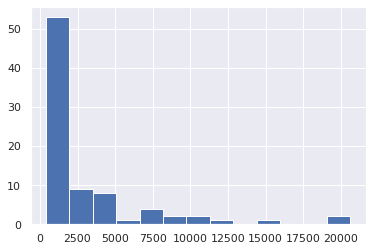

In [12]:
k = int(np.ceil(1+np.log2(3333)))  # Sturges Rule
plt.hist(random_sample_df['salary'], bins= k)